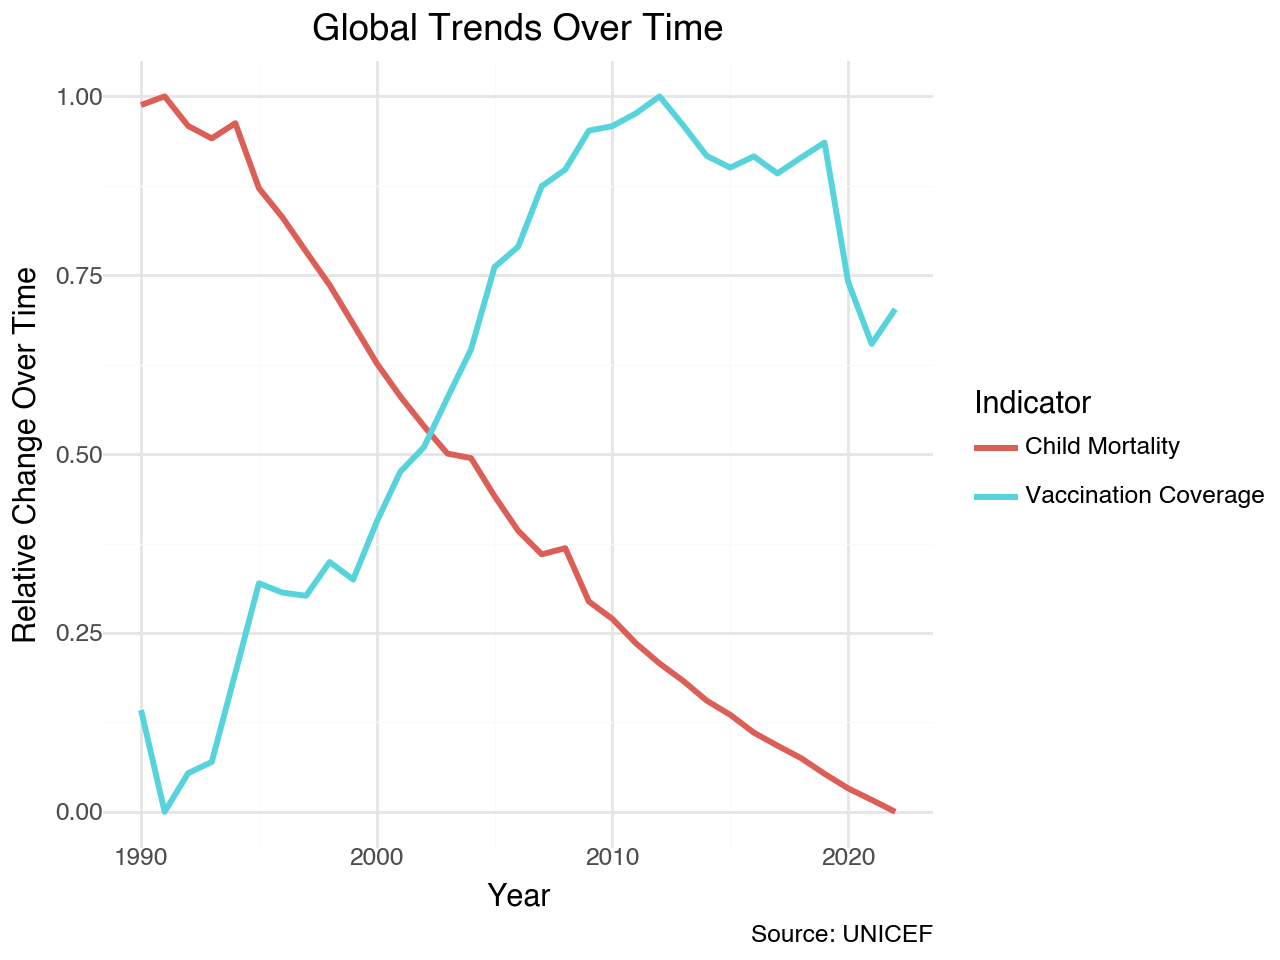

In [2]:
import polars as pl
import pandas as pd
from plotnine import ggplot, aes, geom_line, labs, theme_minimal


df = pl.read_csv("cleaned_unicef_data.csv")

trend_df = (
    df.group_by("time_period")
    .agg([
        pl.col("vaccination_coverage").mean().alias("avg_vaccination"),
        pl.col("child_mortality").sum().alias("total_mortality")
    ])
    .sort("time_period")
)


trend_pd = trend_df.to_pandas()


trend_pd["norm_vaccination"] = (trend_pd["avg_vaccination"] - trend_pd["avg_vaccination"].min()) / (
    trend_pd["avg_vaccination"].max() - trend_pd["avg_vaccination"].min()
)
trend_pd["norm_mortality"] = (trend_pd["total_mortality"] - trend_pd["total_mortality"].min()) / (
    trend_pd["total_mortality"].max() - trend_pd["total_mortality"].min()
)


melted = pd.melt(
    trend_pd,
    id_vars=["time_period"],
    value_vars=["norm_vaccination", "norm_mortality"],
    var_name="indicator",
    value_name="value"
)


melted["indicator"] = melted["indicator"].map({
    "norm_vaccination": "Vaccination Coverage",
    "norm_mortality": "Child Mortality"
})


(
    ggplot(melted, aes(x="time_period", y="value", color="indicator")) +
    geom_line(size=1.2) +
    labs(
        title="Global Trends Over Time",
        x="Year",
        y="Relative Change Over Time",  
        color="Indicator",
        caption="Source: UNICEF"
    ) +
    theme_minimal()
)



In [12]:
print(top_vax_pd)
print(top_vax_pd.dtypes)


                          country    avg_vax
0                         Hungary  99.000000
1                          Monaco  98.939394
2                            Oman  98.606061
3                            Niue  98.454545
4                          Sweden  98.212121
5                        Slovakia  98.206897
6  St. Vincent and the Grenadines  98.147368
7           Saint Kitts and Nevis  98.060606
8                      Seychelles  97.912500
9       Iran, Islamic Republic of  97.878788
country     object
avg_vax    float64
dtype: object


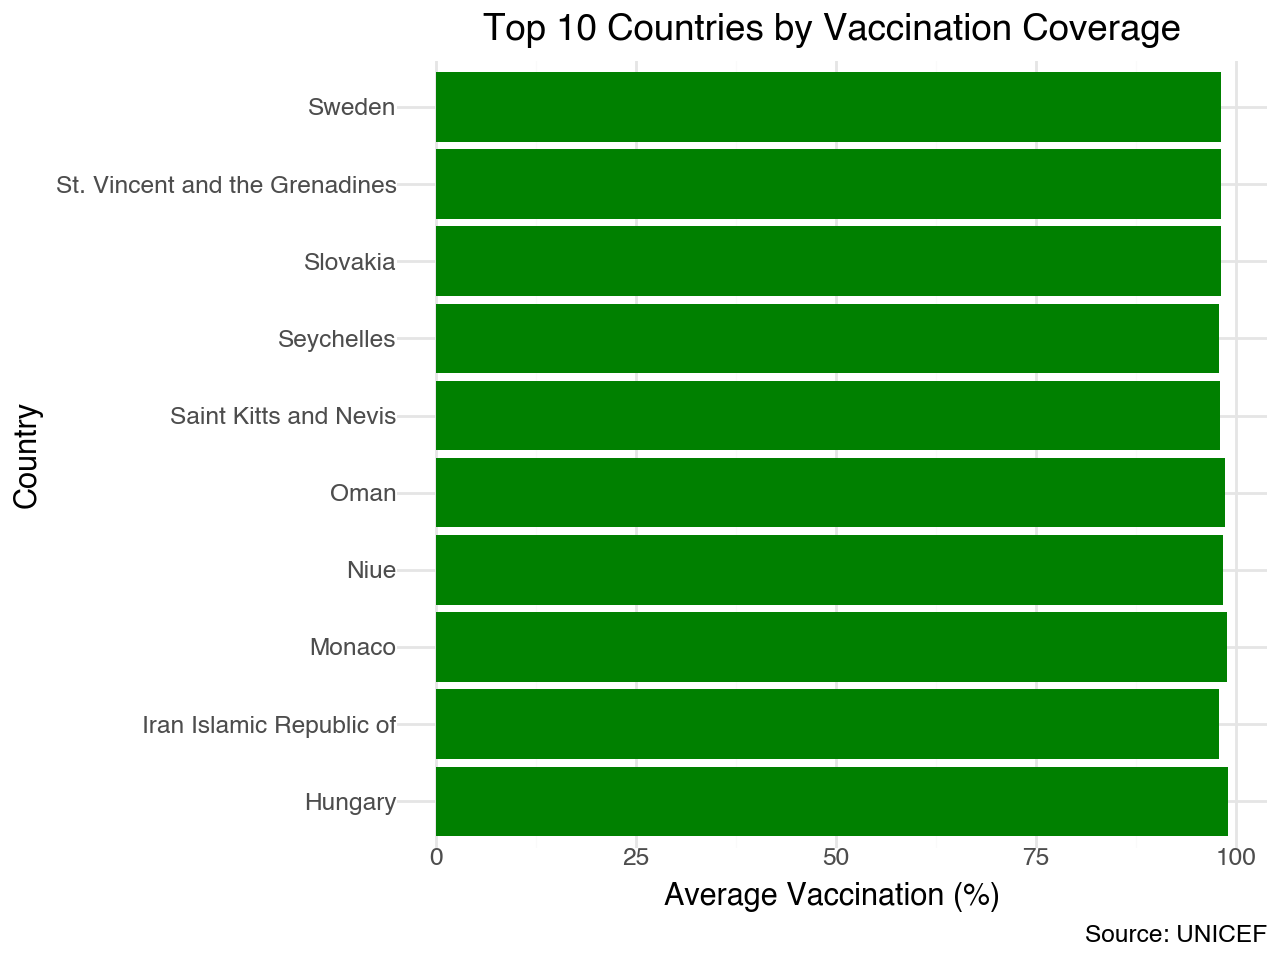

In [22]:
import polars as pl
import pandas as pd
from plotnine import ggplot, aes, geom_col, coord_flip, labs, theme_minimal


df = pl.read_csv("cleaned_unicef_data.csv")

top_vax_df = (
    df.group_by("country")
    .agg(pl.col("vaccination_coverage").mean().alias("avg_vax"))
    .sort("avg_vax", descending=True)
    .head(10)
)


top_vax_pd = top_vax_df.to_pandas()
top_vax_pd["country"] = top_vax_pd["country"].astype(str).str.replace(",", "")
top_vax_pd["avg_vax"] = pd.to_numeric(top_vax_pd["avg_vax"], errors="coerce").round(2)
top_vax_pd = top_vax_pd.sort_values("avg_vax", ascending=True)


(
    ggplot(top_vax_pd, aes(x="country", y="avg_vax")) +
    geom_col(fill="green") +  
    coord_flip() +
    labs(
        title="Top 10 Countries by Vaccination Coverage",
        x="Country",
        y="Average Vaccination (%)",
        caption="Source: UNICEF"
    ) +
    theme_minimal()
)


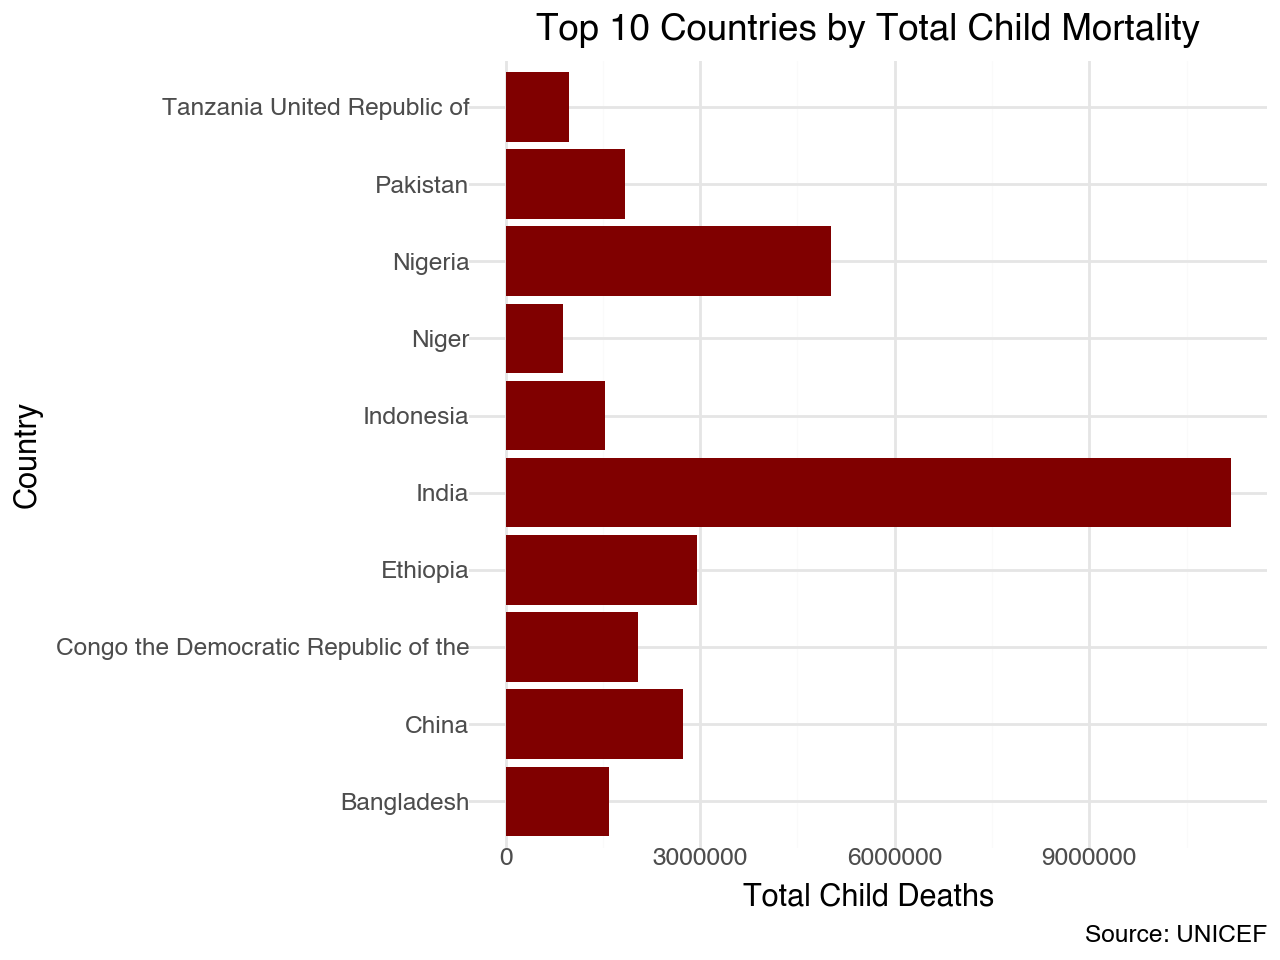

In [24]:
import polars as pl
import pandas as pd
from plotnine import ggplot, aes, geom_col, coord_flip, labs, theme_minimal

df = pl.read_csv("cleaned_unicef_data.csv")


top_mort_df = (
    df.group_by("country")
    .agg(pl.col("child_mortality").sum().alias("total_mortality"))
    .sort("total_mortality", descending=True)
    .head(10)
)


top_mort_pd = top_mort_df.to_pandas()
top_mort_pd["country"] = top_mort_pd["country"].astype(str).str.replace(",", "")
top_mort_pd["total_mortality"] = pd.to_numeric(top_mort_pd["total_mortality"], errors="coerce").round(0)
top_mort_pd = top_mort_pd.sort_values("total_mortality", ascending=True)


(
    ggplot(top_mort_pd, aes(x="country", y="total_mortality")) +
    geom_col(fill="#800000") +  
    coord_flip() +
    labs(
        title="Top 10 Countries by Total Child Mortality",
        x="Country",
        y="Total Child Deaths",
        caption="Source: UNICEF"
    ) +
    theme_minimal()
)


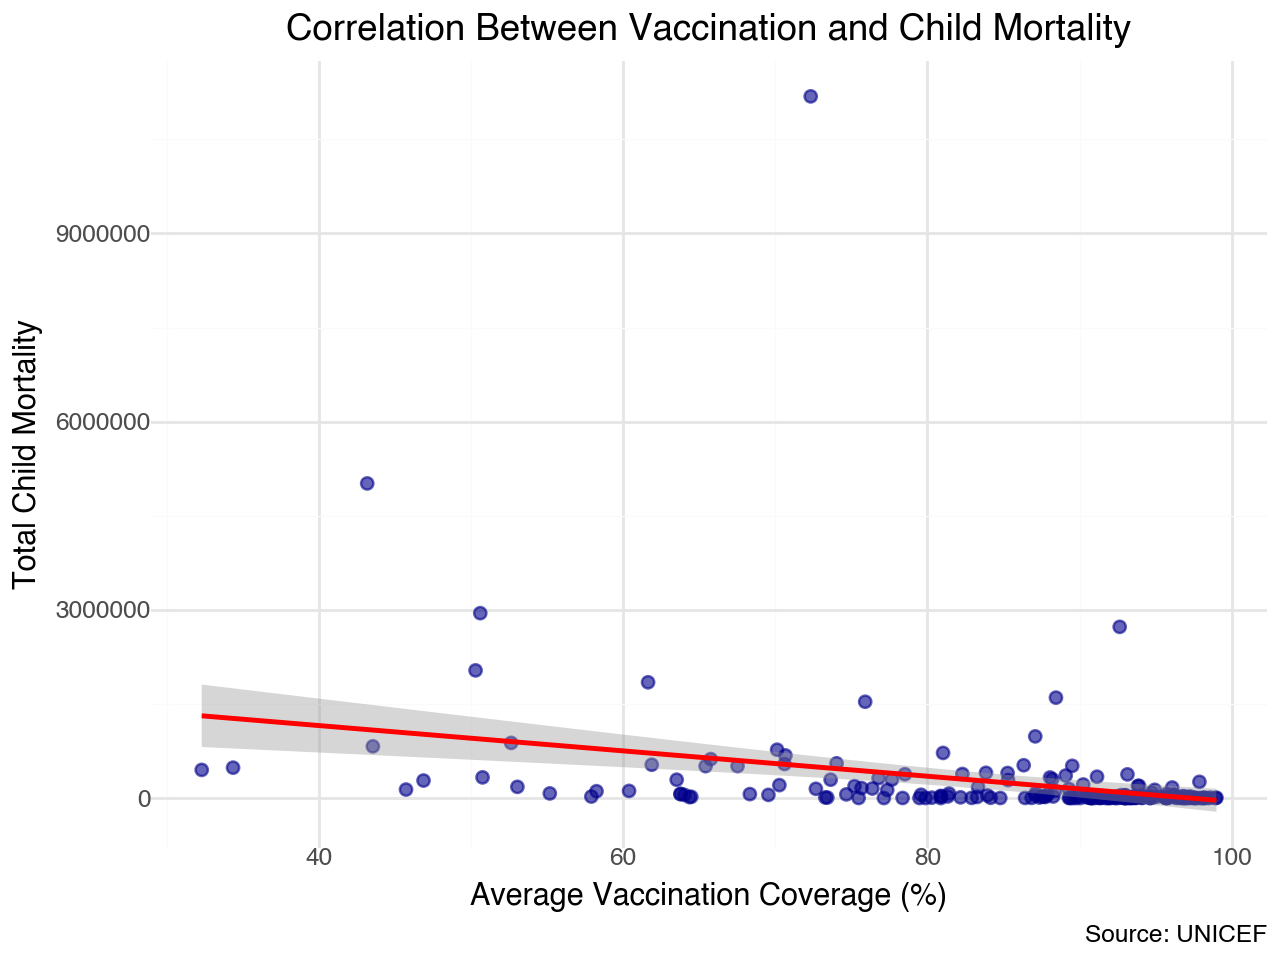

In [26]:
import polars as pl
import pandas as pd
from plotnine import ggplot, aes, geom_point, geom_smooth, labs, theme_minimal

df = pl.read_csv("cleaned_unicef_data.csv")

correlation_df = (
    df.group_by("country")
    .agg([
        pl.col("vaccination_coverage").mean().alias("avg_vax"),
        pl.col("child_mortality").sum().alias("total_mortality")
    ])
)


correlation_pd = correlation_df.to_pandas()
correlation_pd["country"] = correlation_pd["country"].astype(str).str.replace(",", "")
correlation_pd["avg_vax"] = pd.to_numeric(correlation_pd["avg_vax"], errors="coerce").round(2)
correlation_pd["total_mortality"] = pd.to_numeric(correlation_pd["total_mortality"], errors="coerce").round(0)


(
    ggplot(correlation_pd, aes(x="avg_vax", y="total_mortality")) +
    geom_point(color="darkblue", size=2, alpha=0.6) +
    geom_smooth(method="lm", color="red") +
    labs(
        title="Correlation Between Vaccination and Child Mortality",
        x="Average Vaccination Coverage (%)",
        y="Total Child Mortality",
        caption="Source: UNICEF"
    ) +
    theme_minimal()
)
